In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
num_humans = [5, 7, 10, 15]
test_sizes = ['500', '999', '5000', '9999']
datasets = {'cifar10h':'cnn_data','imagenet':'imagenet_data'}

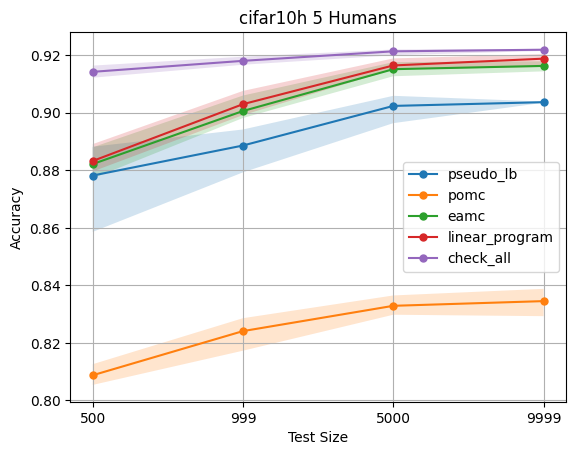

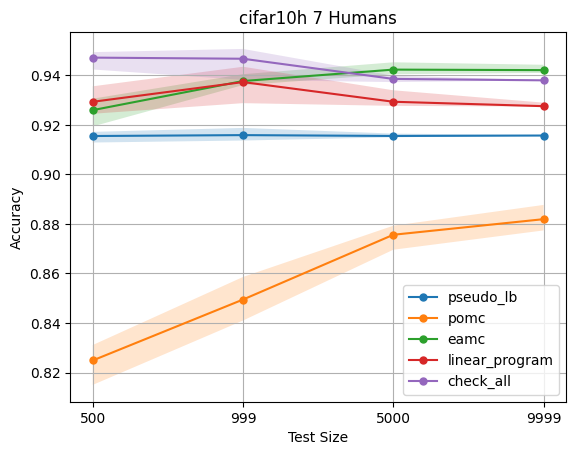

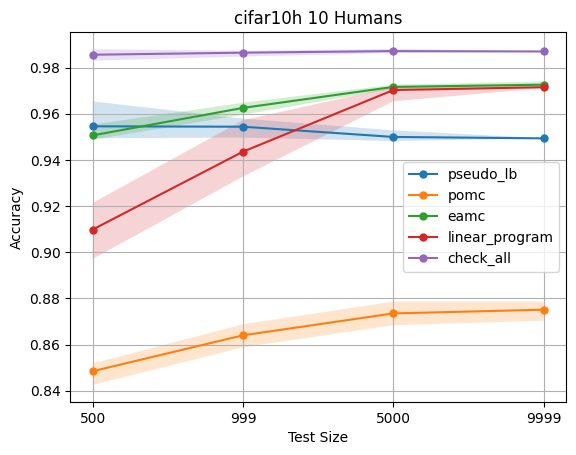

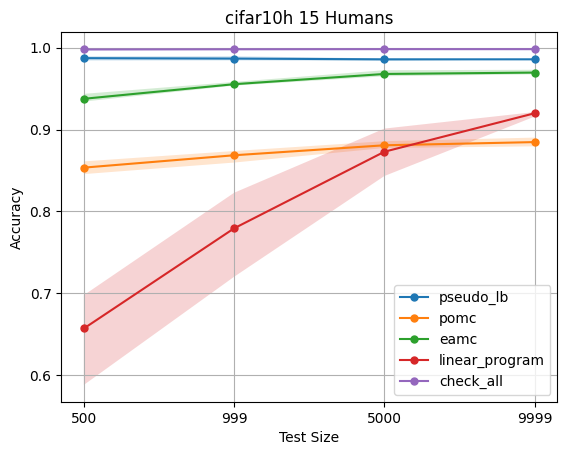

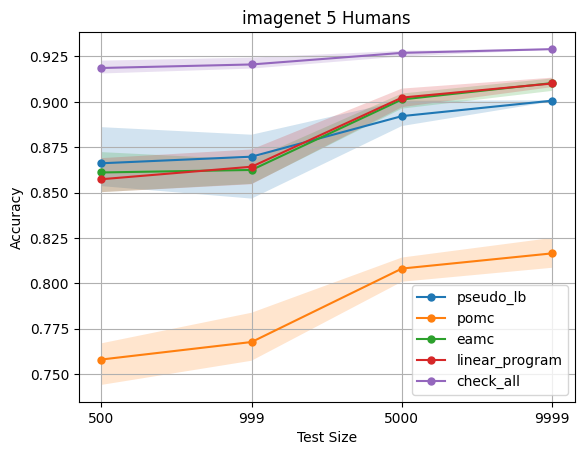

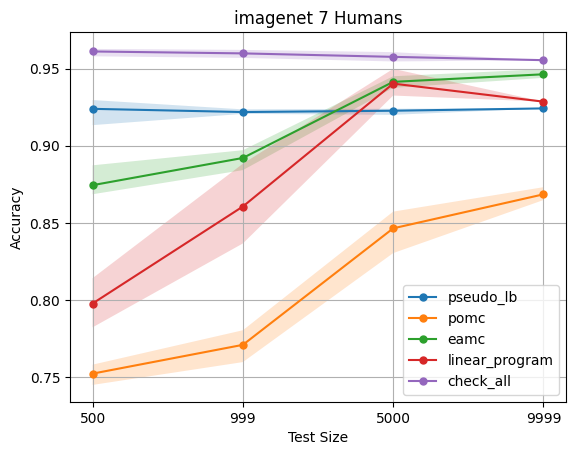

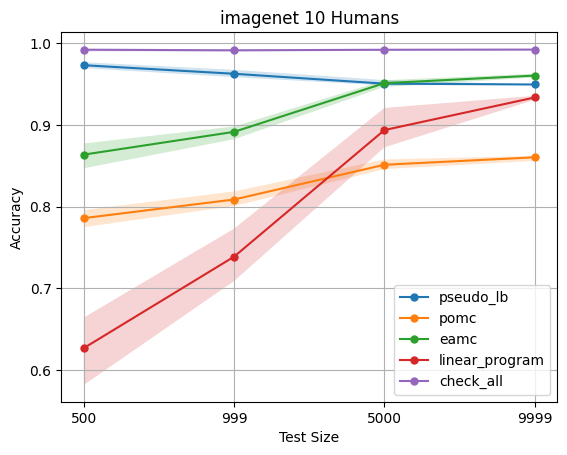

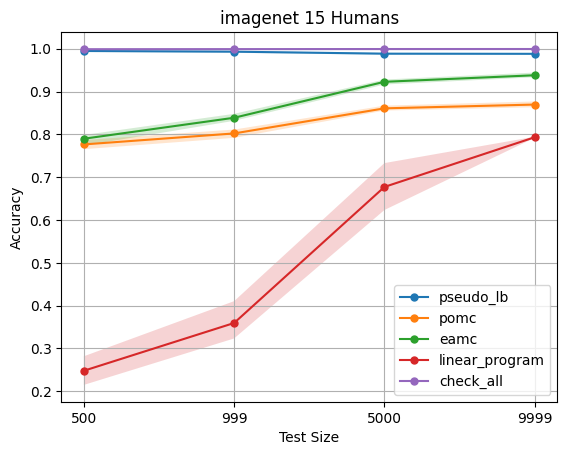

In [25]:
for dataset,filename in datasets.items():
    for num_human in num_humans:
        avg_test_size_data = []
        min_test_size_data = []
        max_test_size_data = []
        labels = []
        for test_size in test_sizes:
            data = pd.read_csv(f"output/{dataset}/accuracy/{num_human}_{filename}_accuracy_{test_size}.csv")
            labels = data.columns
            # print(labels)
            data = data[1:].to_numpy()
            # print(data)
            avg_test_size_data.append(np.mean(data, axis=0))
            min_test_size_data.append(np.min(data, axis=0))
            max_test_size_data.append(np.max(data, axis=0))
        avg_test_size_data = np.transpose(np.array(avg_test_size_data))
        min_test_size_data = np.transpose(np.array(min_test_size_data))
        max_test_size_data = np.transpose(np.array(max_test_size_data))
        labels= labels[2:]
        avg_test_size_data = avg_test_size_data[2:]
        min_test_size_data = min_test_size_data[2:]
        max_test_size_data = max_test_size_data[2:]

        for i in range(len(avg_test_size_data)):
            plt.plot(test_sizes, avg_test_size_data[i], label=labels[i], marker='o', markersize=5)
            plt.fill_between(test_sizes, min_test_size_data[i], max_test_size_data[i], alpha=0.2)
        plt.xlabel('Test Size')
        plt.ylabel('Accuracy')
        # plt.yticks(np.arange(0.5, 1.0, step=0.1))
        plt.title(f'{dataset} {num_human} Humans')
        plt.legend()
        plt.grid(True)
        plt.show()

                


In [37]:
algos = ['check_all', 'eamc', 'linear_program', 'pomc', 'pseudo_lb']
test_sizes = ['500', '999', '5000', '9999']
num_humans = [5, 7, 10, 15]
num_classes = {'cifar10h':10, 'imagenet':16}

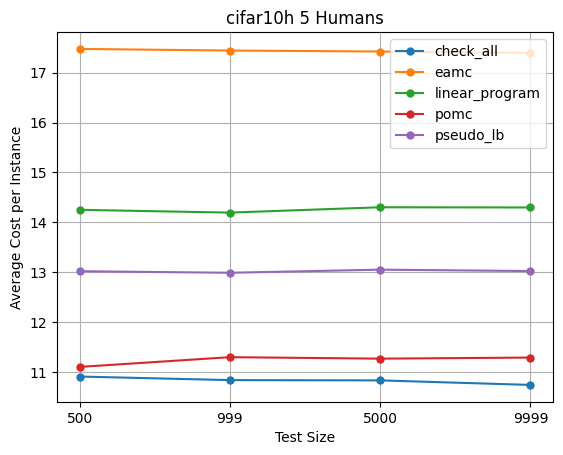

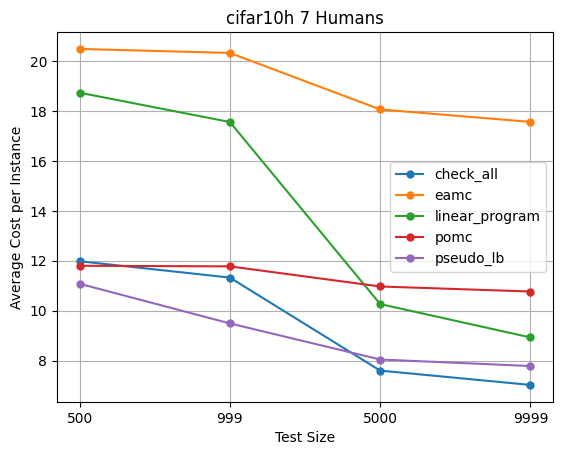

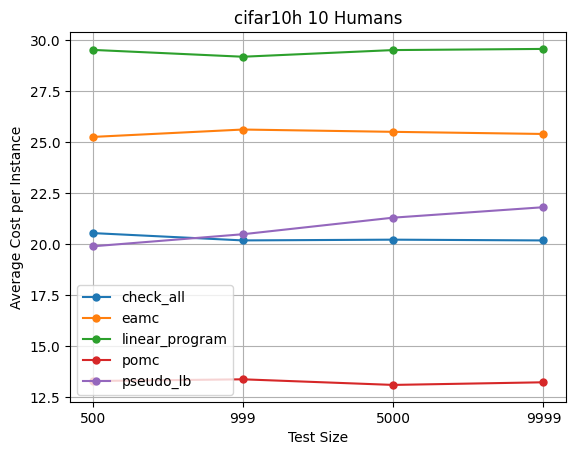

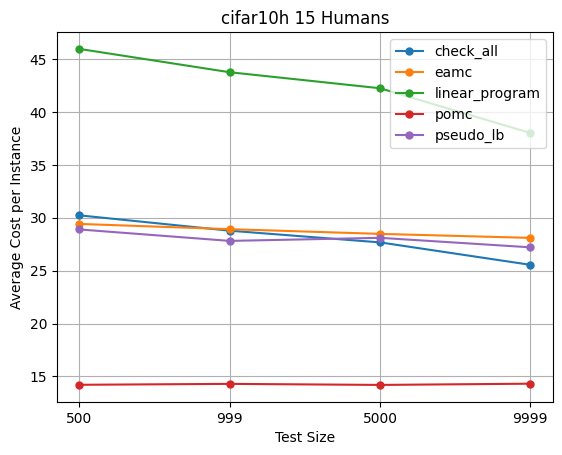

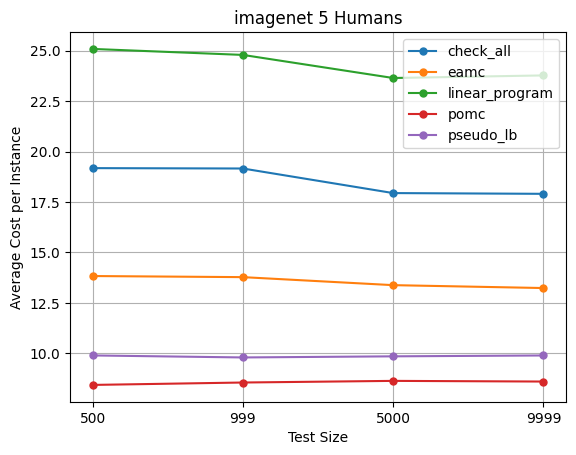

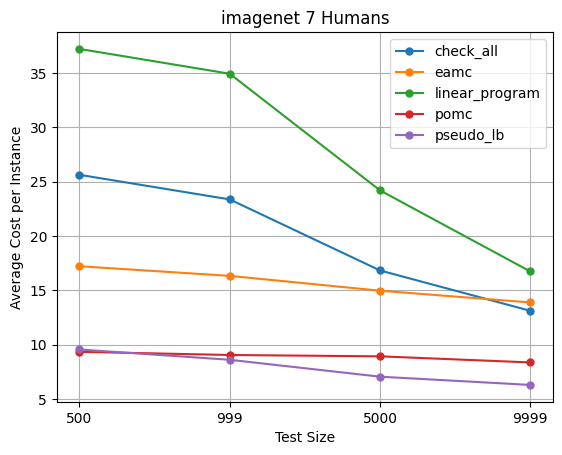

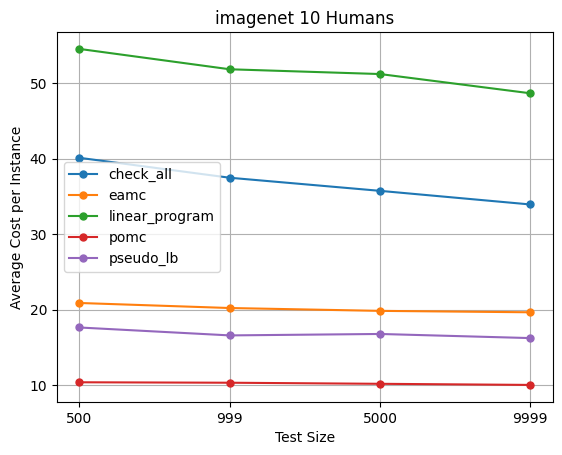

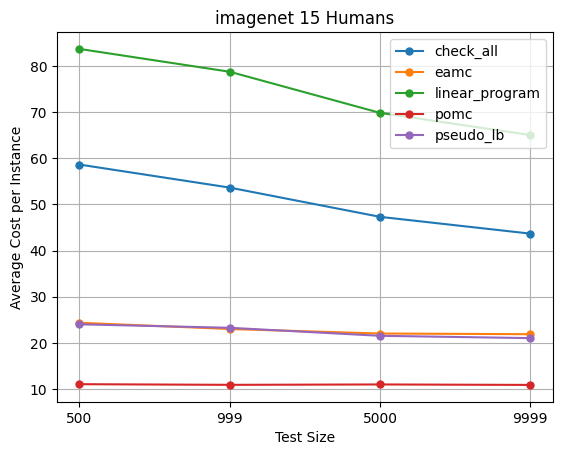

In [38]:
for dataset in datasets.keys():
    for num_human in num_humans:
        algo_data = []
        for algo in algos:
            test_size_data = []
            for test_size in test_sizes:
                data = pd.read_csv(f"output/{dataset}/subset_cost/{num_human}_{test_size}_{algo}.csv")
                # print(data)
                data = np.mean(data.to_numpy(), axis=0)
                if data > 1000: 
                    data *= (num_classes[dataset]/10000)
                test_size_data.append(data)
            # print(np.array(test_size_data).shape)
            algo_data.append(test_size_data)
        # print(np.array(algo_data).shape)
        for i in range(len(algo_data)):
            plt.plot(test_sizes, algo_data[i], label=algos[i], marker='o', markersize=5)
        plt.xlabel('Test Size')
        plt.ylabel('Average Cost per Instance')
        # plt.yticks(np.arange(0.5, 1.0, step=0.1))
        plt.title(f'{dataset} {num_human} Humans')
        plt.legend()
        plt.grid(True)
        plt.show()